<a href="https://colab.research.google.com/github/Pathway2008/Loan_rating/blob/main/classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/loan_rating/train.csv')
test = pd.read_csv('/content/drive/MyDrive/loan_rating/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/loan_rating/sample_submission.csv')

In [60]:
train.drop(['ID'],axis=1,inplace=True)

In [74]:
train = train[train['주택소유상태'] != 'ANY']
train['근로기간'] = train['근로기간'].replace('< 1 year', '<1 year')
train['근로기간'] = train['근로기간'].replace('1 year', '1 years')
train['근로기간'] = train['근로기간'].replace('3', '3 years')
train['근로기간'] = train['근로기간'].replace('10+years', '10+ years')

<ipython-input-74-db9ed8527d6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['근로기간'] = train['근로기간'].replace('< 1 year', '<1 year')
<ipython-input-74-db9ed8527d6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['근로기간'] = train['근로기간'].replace('1 year', '1 years')
<ipython-input-74-db9ed8527d6d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [19]:
train['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 years', '3 years', '7 years', '4 years', '<1 year'],
      dtype=object)

In [62]:
train['근로기간'] = train['근로기간'].replace({
    '<1 year': 0,
    '1 years': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    'Unknown': None  # Replace 'Unknown' with None (NaN)
})

In [63]:
train['근로기간'] = pd.to_numeric(train['근로기간'], errors='coerce')

In [64]:
train['근로기간'].unique()

array([ 6., 10.,  5.,  8., nan,  9.,  2.,  1.,  3.,  7.,  4.,  0.])

In [65]:
from sklearn.preprocessing import LabelEncoder
ordinal_features = ['대출기간','주택소유상태','대출목적','대출등급']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96293 entries, 0 to 96293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96293 non-null  int64  
 1   대출기간          96293 non-null  int64  
 2   근로기간          90622 non-null  float64
 3   주택소유상태        96293 non-null  int64  
 4   연간소득          96293 non-null  int64  
 5   부채_대비_소득_비율   96293 non-null  float64
 6   총계좌수          96293 non-null  int64  
 7   대출목적          96293 non-null  int64  
 8   최근_2년간_연체_횟수  96293 non-null  int64  
 9   총상환원금         96293 non-null  int64  
 10  총상환이자         96293 non-null  float64
 11  총연체금액         96293 non-null  float64
 12  연체계좌수         96293 non-null  float64
 13  대출등급          96293 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 11.0 MB


In [67]:
train.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,0,6.0,2,72000000,18.90,15,1,0,0,0.0,0.0,0.0,2
1,14400000,1,10.0,0,130800000,22.33,21,10,0,373572,234060.0,0.0,0.0,1
2,12000000,0,5.0,0,96000000,8.60,14,1,0,928644,151944.0,0.0,0.0,0
3,14400000,0,8.0,0,132000000,15.09,15,1,0,325824,153108.0,0.0,0.0,2
4,18000000,1,NaN,2,71736000,25.39,19,8,0,228540,148956.0,0.0,0.0,1


In [68]:
train_un = train[train['근로기간'].isna()].reset_index(drop=True)
train_kn = train[train['근로기간'].notna()].reset_index(drop=True)

In [69]:
len(train), len(train_un), len(train_kn)

(96293, 5671, 90622)

In [51]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.6 MB/s eta 0:00:00


In [70]:
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [71]:
from sklearn.model_selection import train_test_split
X = train_kn.drop(['근로기간'], axis=1)
y = train_kn['근로기간']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [72]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=StratifiedKFold(), scoring='f1_macro')
print(f'XGBoost Cross-Validation F1 Macro: {xgb_scores.mean()}')
xgb_predictions = xgb_model.predict(X_test)
xgb_macro = f1_score(y_test, xgb_predictions, average='macro')
print(f'XGBoost test F1 Macro: {xgb_macro}\n')

# Neural Network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=StratifiedKFold(), scoring='f1_macro')
print(f'Neural Network Cross-Validation F1 Macro: {nn_scores.mean()}')
nn_macro = f1_score(y_test, nn_predictions, average='macro')
print(f'NN test F1 Macro: {nn_macro}\n')

# CatBoost
cat_model = CatBoostClassifier(random_state=42, verbose=False)
cat_model.fit(X_train, y_train)
cat_predictions = cat_model.predict(X_test)
cat_scores = cross_val_score(cat_model, X_train, y_train, cv=StratifiedKFold(), scoring='f1_macro')
print(f'CatBoost Cross-Validation F1 Macro: {cat_scores.mean()}')
cat_macro = f1_score(y_test, cat_predictions, average='macro')
print(f'Cat test F1 Macro: {cat_macro}\n')

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=StratifiedKFold(), scoring='f1_macro')
print(f'Random Forest Cross-Validation F1 Macro: {rf_scores.mean()}')
rf_macro = f1_score(y_test, rf_predictions, average='macro')
print(f'RF test F1 Macro: {rf_macro}\n')

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=StratifiedKFold(), scoring='f1_macro')
print(f'LightGBM Cross-Validation F1 Macro: {lgb_scores.mean()}')
lgb_macro = f1_score(y_test, lgb_predictions, average='macro')
print(f'RF test F1 Macro: {lgb_macro}\n')

XGBoost Cross-Validation F1 Macro: 0.071337945654345
XGBoost test F1 Macro: 0.07027977204646706

Neural Network Cross-Validation F1 Macro: 0.03834032966821919
NN test F1 Macro: 0.028215862817501467

CatBoost Cross-Validation F1 Macro: 0.06845433302553883
Cat test F1 Macro: 0.06656113394458918

Random Forest Cross-Validation F1 Macro: 0.0808528233270525
RF test F1 Macro: 0.081541426214492

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 63435, number of used features: 13
[LightGBM] [Info] Start training from score -2.409374
[LightGBM] [Info] Start training from score -2.665461
[LightGBM] [Info] Start training from score -2.372524
[LightGBM] [Info] Start training from score -2.469374
[LightGBM] [Info] Start training from score -2.786223
[LightGBM] [Info] Start training from score -2.77

#classifier

In [75]:
from sklearn.preprocessing import LabelEncoder
ordinal_features = ['대출기간', '근로기간', '주택소유상태','대출목적']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [76]:
train['대출등급'] = le.fit_transform(train['대출등급'])

In [77]:
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

In [79]:
from sklearn.model_selection import train_test_split
X = train.drop(['대출등급'], axis=1)
y = train['대출등급']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [81]:
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [82]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_train,y_train)

score = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='f1_macro')

In [83]:
score, score.mean()

(array([0.78101374, 0.77426212, 0.7588344 , 0.78937217, 0.77887349]),
 0.7764711833064839)

In [84]:
y_pred = xgb_model.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_macro

0.7763483492896533

In [93]:
f1_per_class = f1_score(y_test, y_pred, labels=range(7), average=None)
print(f'XGBoost Test F1 Score for Each Class:')
for class_label, f1 in zip(range(7), f1_per_class):
    print(f'Class {class_label}: {f1}')

XGBoost Test F1 Score for Each Class:
Class 0: 0.8816025513254933
Class 1: 0.8640091769429309
Class 2: 0.8708851717364128
Class 3: 0.8029087261785356
Class 4: 0.7565258661604176
Class 5: 0.7321911632100991
Class 6: 0.5263157894736842


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [85]:
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=kf, scoring='f1_macro')
print(f'Neural Network Cross-Validation F1 Macro: {nn_scores.mean()}')
nn_macro = f1_score(y_test, nn_predictions, average='macro')
print(f'NN test F1 Macro: {nn_macro}\n')

Neural Network Cross-Validation F1 Macro: 0.32585599312025615
NN test F1 Macro: 0.2613949870914612



In [87]:
cat_model = CatBoostClassifier(random_state=42, verbose=False)
cat_model.fit(X_train, y_train)
cat_predictions = cat_model.predict(X_test)
cat_scores = cross_val_score(cat_model, X_train, y_train, cv=kf, scoring='f1_macro')
print(f'CatBoost Cross-Validation F1 Macro: {cat_scores.mean()}')
cat_macro = f1_score(y_test, cat_predictions, average='macro')
print(f'Cat test F1 Macro: {cat_macro}\n')

CatBoost Cross-Validation F1 Macro: 0.7353502957831554
Cat test F1 Macro: 0.7437448840137357



In [95]:
f1_per_class = f1_score(y_test, cat_predictions, average=None)
print(f'XGBoost Test F1 Score for Each Class:')
for class_label, f1 in zip(range(7), f1_per_class):
    print(f'Class {class_label}: {f1}')

XGBoost Test F1 Score for Each Class:
Class 0: 0.8627055381821851
Class 1: 0.8468995583089542
Class 2: 0.8570593051818926
Class 3: 0.7708901562112571
Class 4: 0.7024731451411441
Class 5: 0.6987951807228916
Class 6: 0.46739130434782616


In [89]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='f1_macro')
print(f'Random Forest Cross-Validation F1 Macro: {rf_scores.mean()}')
rf_macro = f1_score(y_test, rf_predictions, average='macro')
print(f'RF test F1 Macro: {rf_macro}\n')

Random Forest Cross-Validation F1 Macro: 0.6434220167503067
RF test F1 Macro: 0.6613987707833431



In [96]:
f1_per_class = f1_score(y_test, rf_predictions, average=None)
print(f'XGBoost Test F1 Score for Each Class:')
for class_label, f1 in zip(range(7), f1_per_class):
    print(f'Class {class_label}: {f1}')

XGBoost Test F1 Score for Each Class:
Class 0: 0.8581728293336081
Class 1: 0.8376733175515725
Class 2: 0.8262697420747642
Class 3: 0.7061734826777806
Class 4: 0.6658227848101266
Class 5: 0.5774058577405858
Class 6: 0.15827338129496402


In [91]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring='f1_macro')
print(f'LightGBM Cross-Validation F1 Macro: {lgb_scores.mean()}')
lgb_macro = f1_score(y_test, lgb_predictions, average='macro')
print(f'RF test F1 Macro: {lgb_macro}\n')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 67405, number of used features: 13
[LightGBM] [Info] Start training from score -1.747717
[LightGBM] [Info] Start training from score -1.206424
[LightGBM] [Info] Start training from score -1.248802
[LightGBM] [Info] Start training from score -1.975557
[LightGBM] [Info] Start training from score -2.572111
[LightGBM] [Info] Start training from score -3.897369
[LightGBM] [Info] Start training from score -5.434895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1441
[LightGBM] [Info] Number of data points in the train set: 53924, number o

In [97]:
f1_per_class = f1_score(y_test, lgb_predictions, average=None)
print(f'XGBoost Test F1 Score for Each Class:')
for class_label, f1 in zip(range(7), f1_per_class):
    print(f'Class {class_label}: {f1}')

XGBoost Test F1 Score for Each Class:
Class 0: 0.8726
Class 1: 0.8577168111117489
Class 2: 0.8656047197640118
Class 3: 0.794065432411869
Class 4: 0.7444764649375601
Class 5: 0.701722574796011
Class 6: 0.504


In [106]:
cat_predictions_flat = np.ravel(cat_predictions)

In [110]:
data = {
    'xgb': y_pred,
    'cat': cat_predictions_flat,
    'lgb': lgb_predictions,
    'rf': rf_predictions,
    'sol': y_test

}

pred_df = pd.DataFrame(data)

In [114]:
len(pred_df)

28888

In [111]:
pred_df.head()

,xgb,cat,lgb,rf,sol
72084,2,2,2,2,2
42625,1,1,1,1,0
1288,1,1,1,1,1
19240,1,1,1,1,0
10764,2,2,2,2,2


In [112]:
rows_with_different_values = pred_df[pred_df.apply(lambda row: row.nunique() > 1, axis=1)]
rows_with_different_values

,xgb,cat,lgb,rf,sol
42625,1,1,1,1,0
19240,1,1,1,1,0
86859,2,1,2,1,2
33592,2,2,2,2,1
20396,4,4,4,3,4
...,...,...,...,...,...
21738,1,0,1,1,1
33837,0,0,0,1,0
83610,2,2,2,2,3
88428,0,0,0,0,1


In [115]:
train_wrong = train.loc[rows_with_different_values.index]

In [116]:
train_wrong.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
42625,12000000,0,1,2,60000000,11.19,22,3,0,0,0.0,0.0,0.0,0
19240,18000000,0,11,0,77520000,23.65,21,10,0,1355280,365724.0,0.0,0.0,0
86859,9600000,0,6,2,94800000,19.40,24,1,2,447624,177708.0,0.0,0.0,2
33592,14400000,0,4,1,72000000,22.58,24,1,0,2411736,916644.0,0.0,0.0,1
20396,14400000,1,2,0,46345200,32.54,44,8,0,297540,434088.0,0.0,0.0,4


In [117]:
import warnings
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
warnings.filterwarnings('ignore')
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


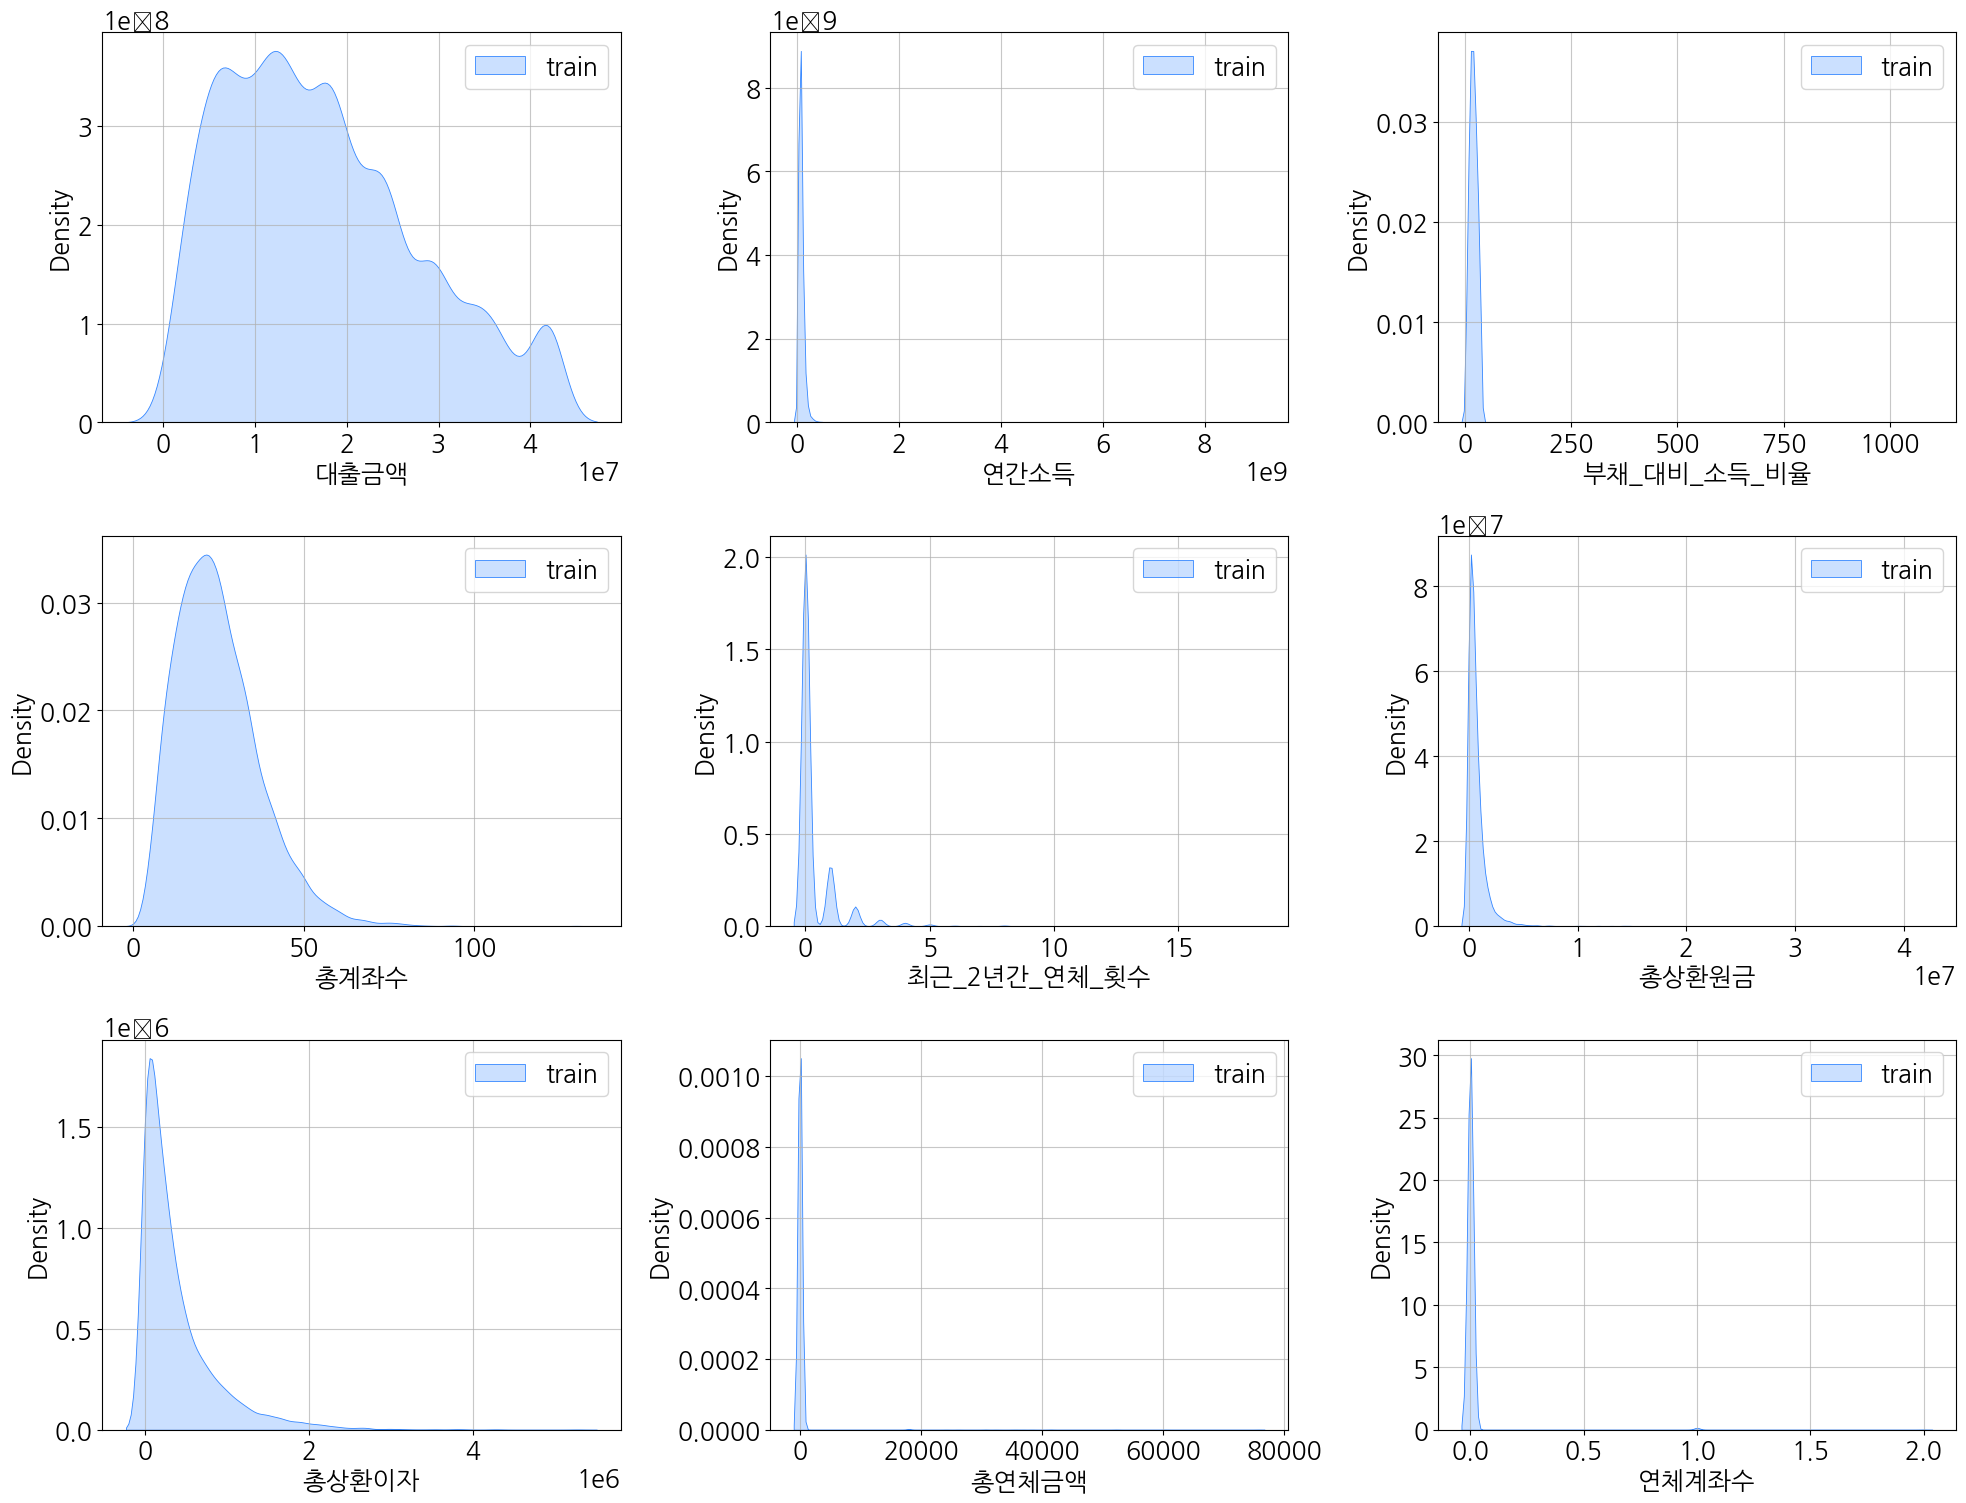

In [119]:
numeric_columns = train_wrong.drop(columns=['대출기간','근로기간','주택소유상태','대출목적','대출등급']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = train_wrong, label = "train")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

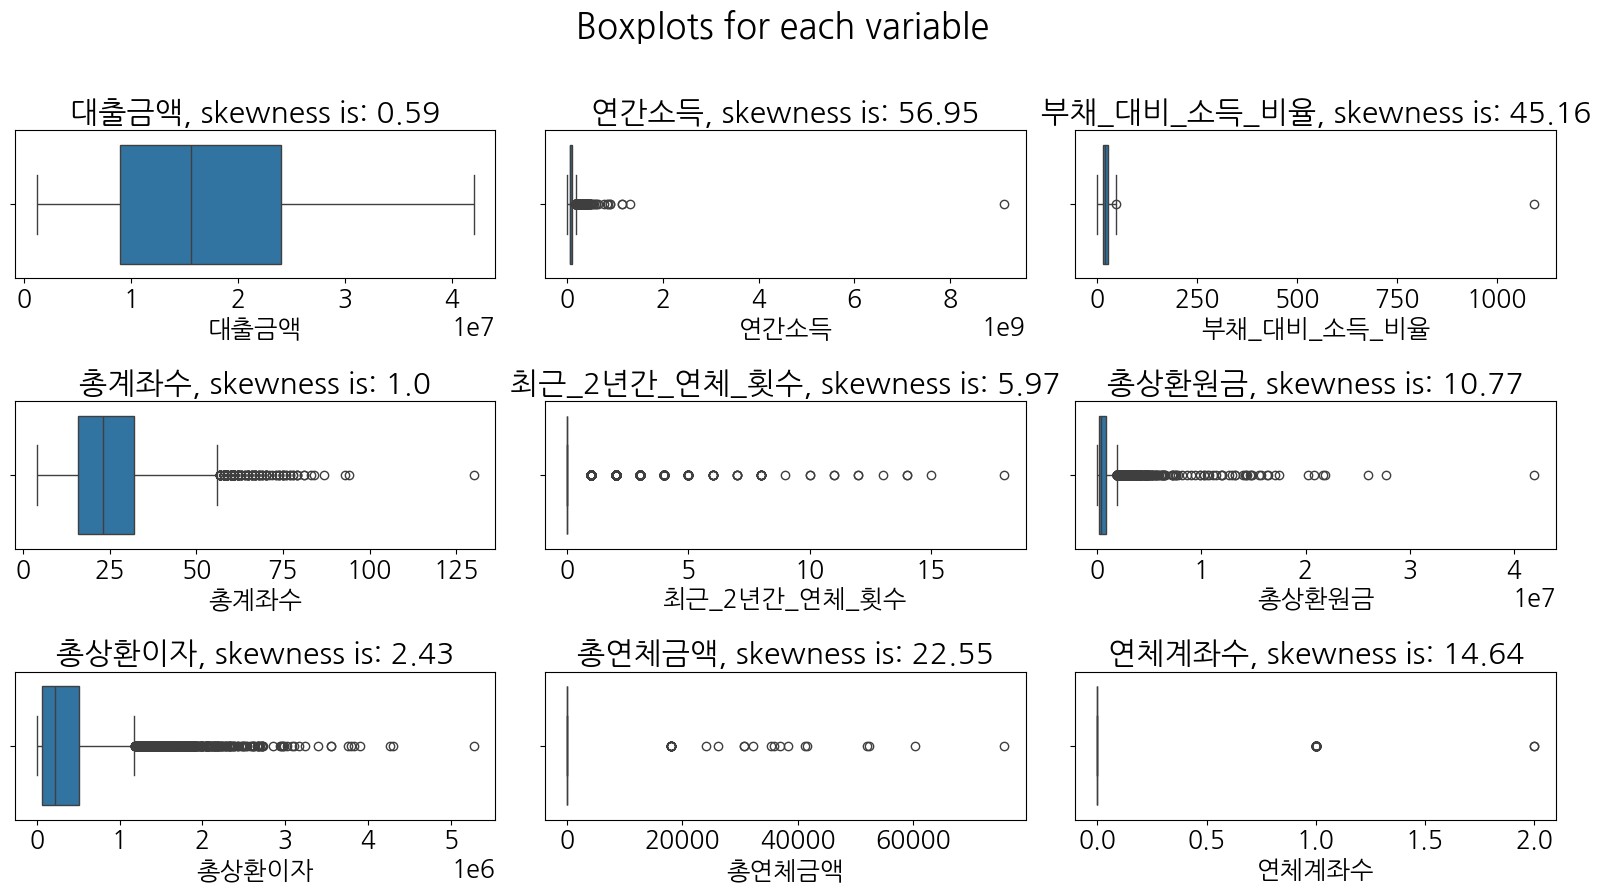

In [121]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3 * rows))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=train_wrong, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

#Standard scaler

In [ ]:
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [123]:
X_train.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
42717,30000000,1,0,0,60000000,27.47,17,1,0,805248,1743384.0,0.0,0.0
82476,6000000,0,1,2,81600000,30.77,25,3,0,291972,87528.0,0.0,0.0
21126,12000000,0,1,0,60000000,37.64,32,1,0,564216,211788.0,0.0,0.0
51982,26640000,1,1,0,53280000,31.89,14,1,0,275352,377100.0,0.0,0.0
58390,26490000,1,1,0,57600000,12.20,52,3,0,561348,732852.0,0.0,0.0


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Standardize the data
columns_to_scale = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled = scaler.transform(X_test[columns_to_scale])

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)
xgb_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=StratifiedKFold(), scoring='f1_macro')
print(f'XGBoost Cross-Validation F1 Macro: {xgb_scores.mean()}')

# Neural Network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_predictions = nn_model.predict(X_test_scaled)
nn_scores = cross_val_score(nn_model, X_train_scaled, y_train, cv=StratifiedKFold(), scoring='f1_macro')
print(f'Neural Network Cross-Validation F1 Macro: {nn_scores.mean()}')

# CatBoost
cat_model = CatBoostClassifier(random_state=42, verbose=False)
cat_model.fit(X_train_scaled, y_train)
cat_predictions = cat_model.predict(X_test_scaled)
cat_scores = cross_val_score(cat_model, X_train_scaled, y_train, cv=StratifiedKFold(), scoring='f1_macro')
print(f'CatBoost Cross-Validation F1 Macro: {cat_scores.mean()}')

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=StratifiedKFold(), scoring='f1_macro')
print(f'Random Forest Cross-Validation F1 Macro: {rf_scores.mean()}')

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_scaled, y_train)
lgb_predictions = lgb_model.predict(X_test_scaled)
lgb_scores = cross_val_score(lgb_model, X_train_scaled, y_train, cv=StratifiedKFold(), scoring='f1_macro')
print(f'LightGBM Cross-Validation F1 Macro: {lgb_scores.mean()}')


XGBoost Cross-Validation F1 Macro: 0.7677969433802303
Neural Network Cross-Validation F1 Macro: 0.7145314940969002
CatBoost Cross-Validation F1 Macro: 0.7213472114759464
Random Forest Cross-Validation F1 Macro: 0.6828954096348061
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1406
[LightGBM] [Info] Number of data points in the train set: 67405, number of used features: 8
[LightGBM] [Info] Start training from score -1.747717
[LightGBM] [Info] Start training from score -1.206424
[LightGBM] [Info] Start training from score -1.248802
[LightGBM] [Info] Start training from score -1.975557
[LightGBM] [Info] Start training from score -2.572111
[LightGBM] [Info] Start training from score -3.897369
[LightGBM] [Info] Start training from score -5.434895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004092 seconds.


In [127]:
data = {
    'xgb': y_pred,
    'cat': cat_predictions_flat,
    'lgb': lgb_predictions,
    'rf': rf_predictions,
    'sol': y_test

}

pred_scale = pd.DataFrame(data)

In [128]:
diff = pred_scale[pred_scale.apply(lambda row: row.nunique() > 1, axis=1)]
diff

,xgb,cat,lgb,rf,sol
42625,1,1,1,1,0
19240,1,1,1,1,0
10764,2,2,2,3,2
86859,2,1,2,2,2
91147,3,3,3,2,3
...,...,...,...,...,...
47759,6,6,5,6,6
21738,1,0,1,1,1
83610,2,2,2,2,3
88428,0,0,0,0,1


In [129]:
train_diff = train.loc[diff.index]

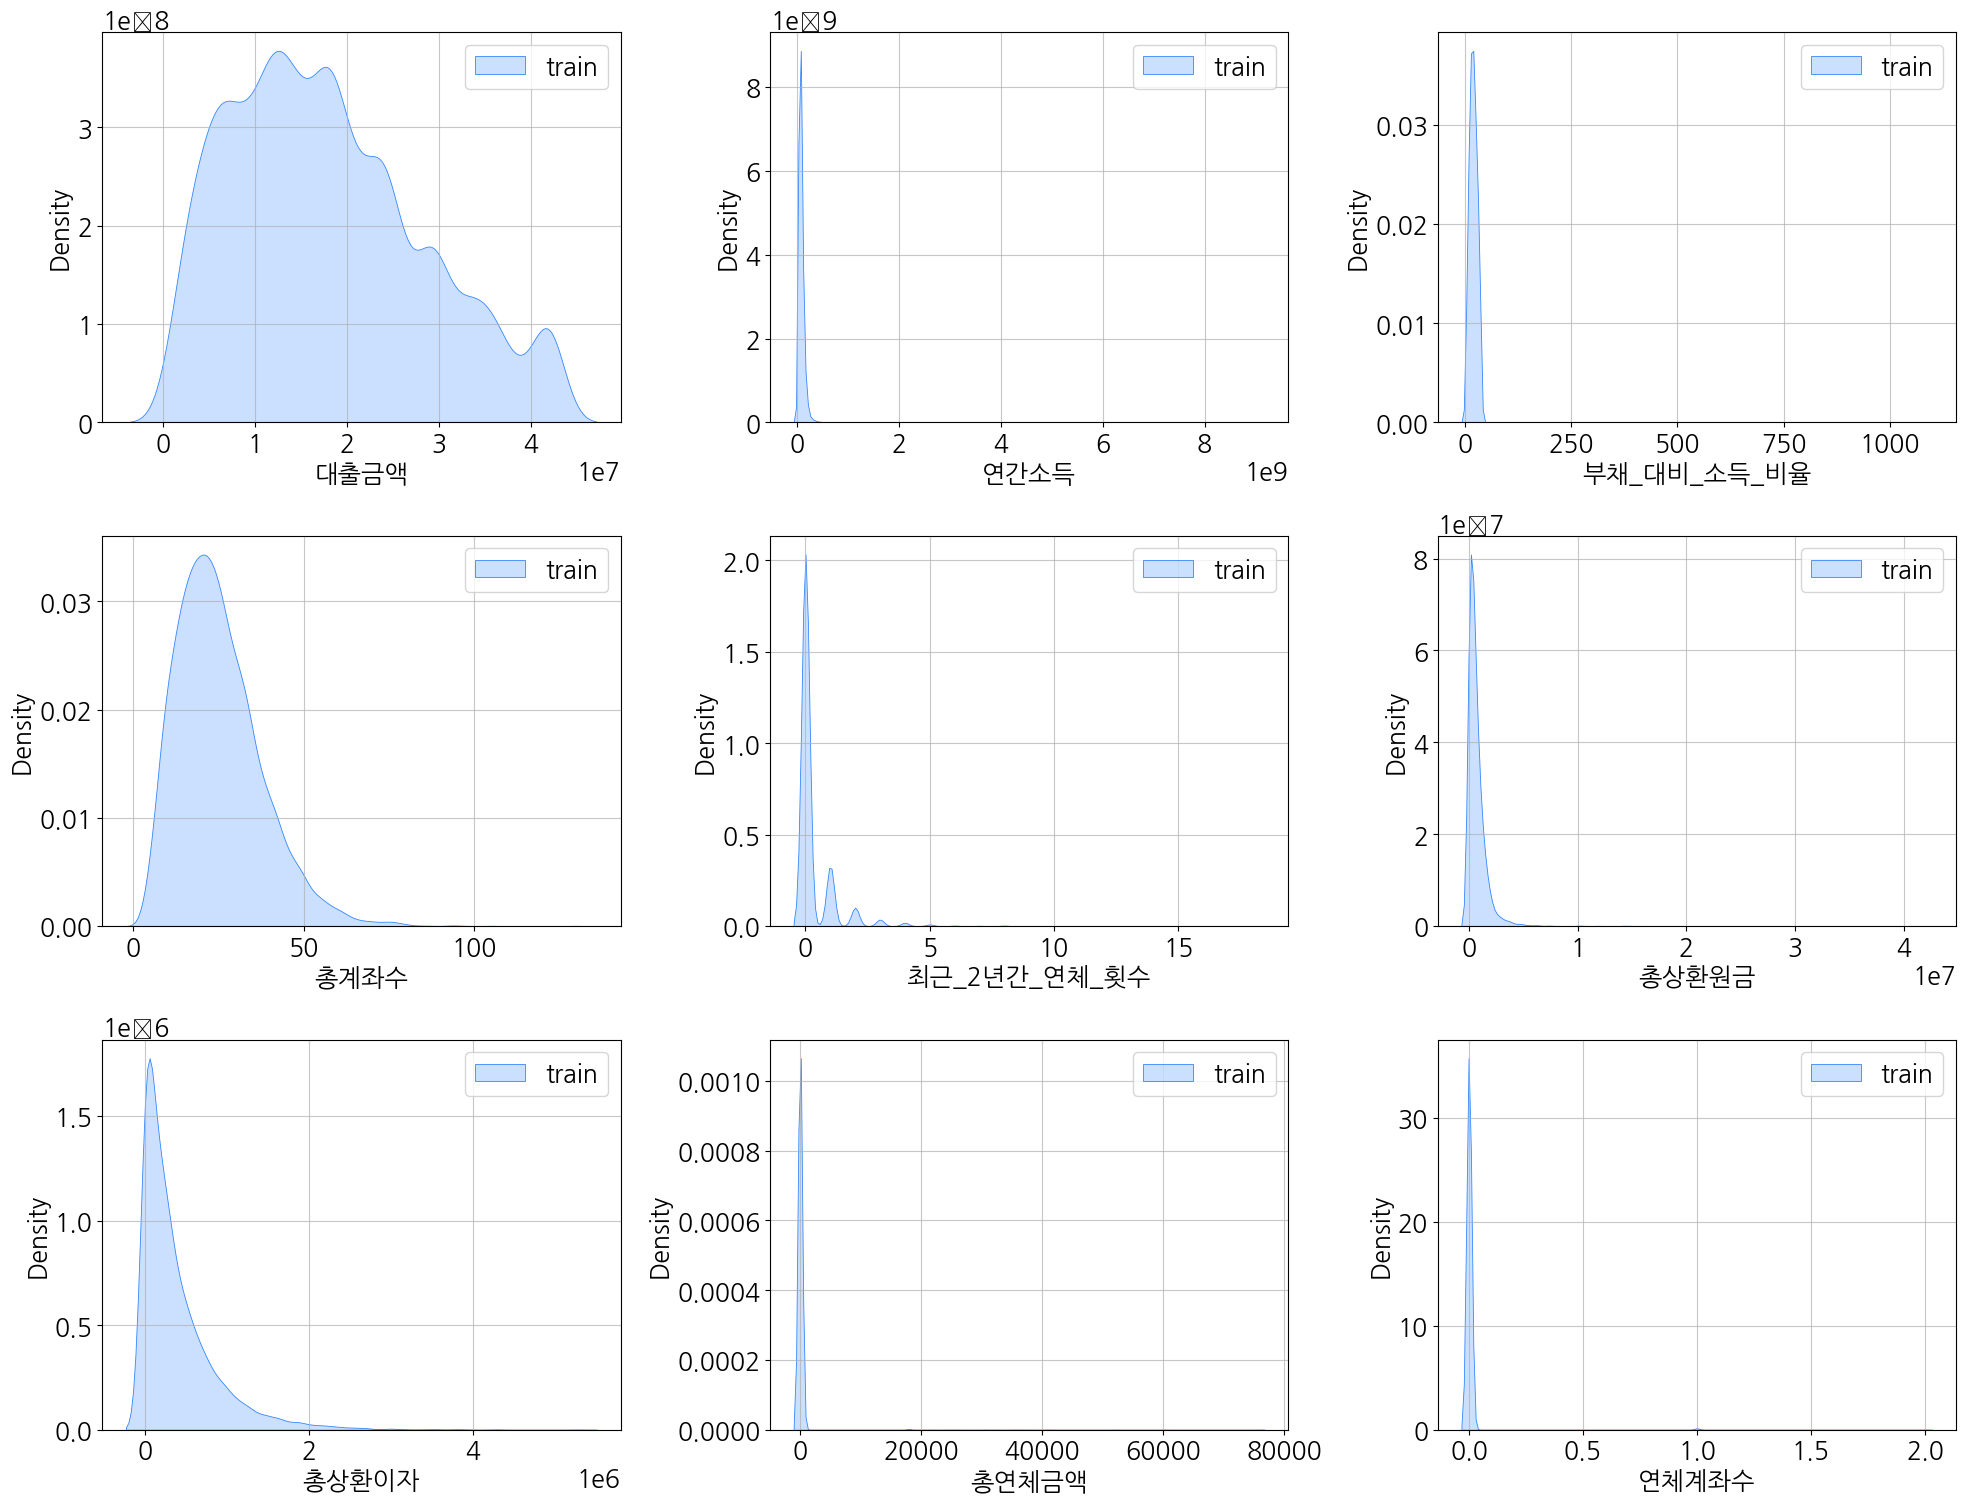

In [130]:
numeric_columns = train_diff.drop(columns=['대출기간','근로기간','주택소유상태','대출목적','대출등급']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = train_diff, label = "train")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

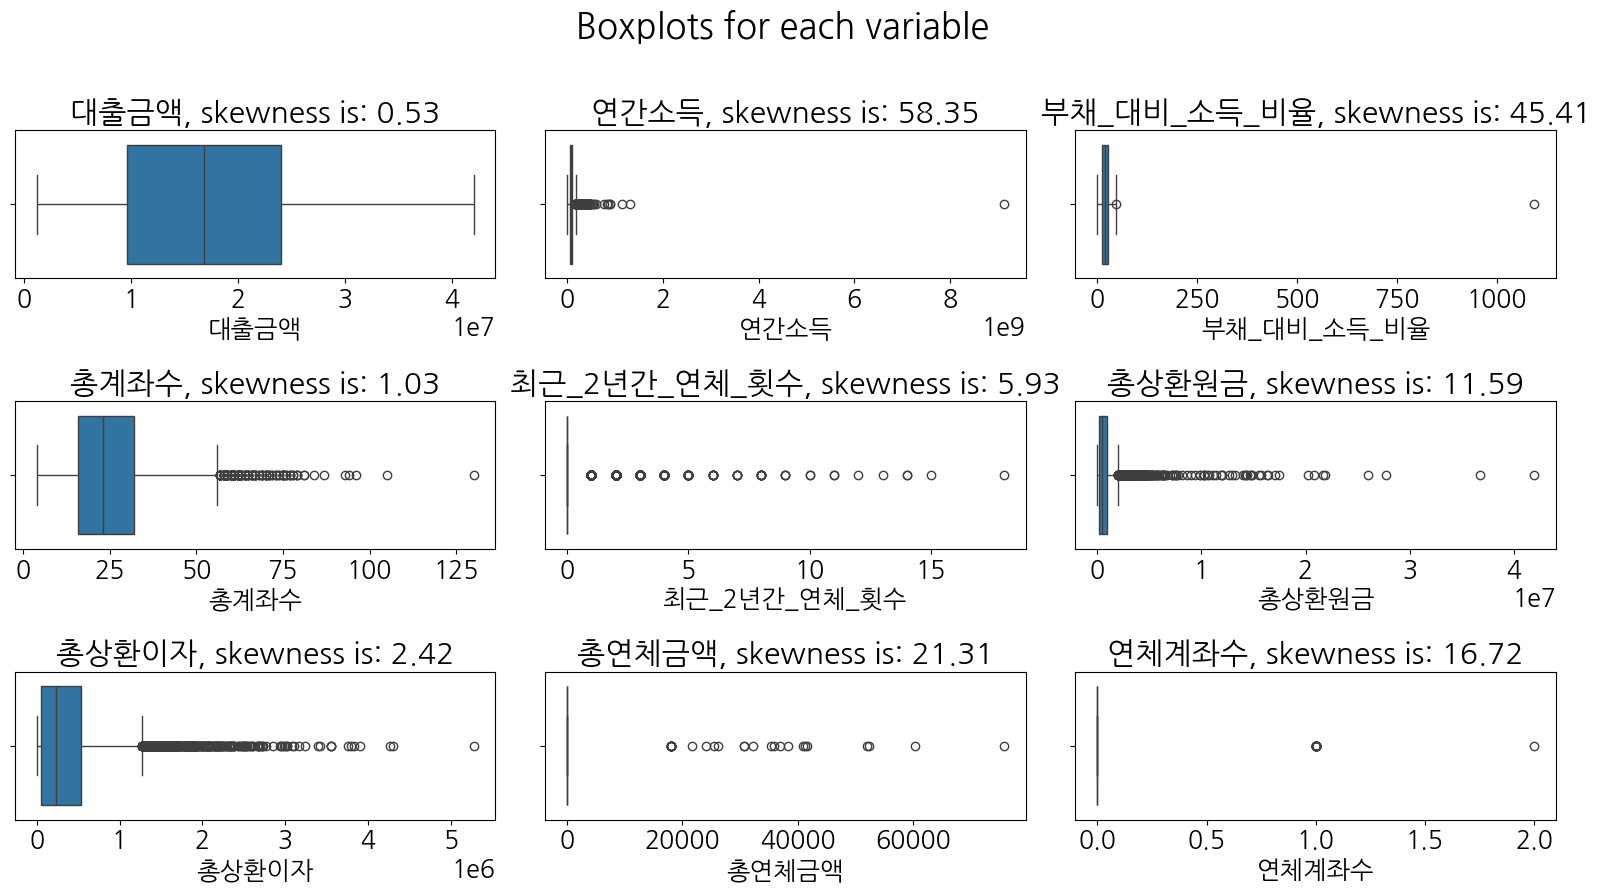

In [131]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3 * rows))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=train_diff, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()